In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/Thesis ')

['Thesis .ipynb',
 'Jakarta Stock Exchange Composite Index Historical Data.csv',
 'Bovespa Historical Data.csv',
 'IPC Historical Data.csv',
 'KOSPI Historical Data.csv',
 'Nifty 50 Historical Data.csv',
 'Tpu.csv',
 'Fedfundrate.csv',
 'MSCI World Historical Data.csv',
 'Thesis_adv']

In [ ]:
import pandas as pd

In [ ]:
tpu = pd.read_csv('/content/drive/MyDrive/Thesis /Tpu.csv')
tpu.columns

Index(['DATE', 'TPU'], dtype='object')

In [ ]:
India_nifty = pd.read_csv('/content/drive/MyDrive/Thesis /Nifty 50 Historical Data.csv')
India_nifty.columns

Index(['DATE', 'LogReturn', 'Volatility', 'Price'], dtype='object')

In [ ]:
msci = pd.read_csv('/content/drive/MyDrive/Thesis /MSCI World Historical Data.csv')
msci.columns

Index(['DATE', 'MSCI'], dtype='object')

In [ ]:
Korea_kospi = pd.read_csv('/content/drive/MyDrive/Thesis /KOSPI Historical Data.csv')
Korea_kospi.columns

Index(['DATE', 'Volatility', 'LogReturn ', 'Price'], dtype='object')

In [ ]:
Indonesia_jci = pd.read_csv('/content/drive/MyDrive/Thesis /Jakarta Stock Exchange Composite Index Historical Data.csv')
Indonesia_jci.columns

Index(['DATE', 'LogReturn', 'Volatility', 'Price'], dtype='object')

In [ ]:
Mexico_ipc = pd.read_csv('/content/drive/MyDrive/Thesis /IPC Historical Data.csv')
Mexico_ipc.columns

Index(['DATE', 'Volatility ', 'LogReturn', 'Price'], dtype='object')

In [ ]:
Brazil_bovespa = pd.read_csv('/content/drive/MyDrive/Thesis /Bovespa Historical Data.csv')
Brazil_bovespa.columns

Index(['DATE', 'Volatility ', 'LogReturn', 'Price', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [ ]:
# 1. Keep only necessary columns
Brazil_bovespa = Brazil_bovespa[['DATE', 'Volatility ', 'LogReturn', 'Price']].copy()

# 2. Strip whitespace from column names
Brazil_bovespa.columns = Brazil_bovespa.columns.str.strip()

# 3. Convert 'Price' column to numeric (removing commas if needed)
Brazil_bovespa['Price'] = Brazil_bovespa['Price'].astype(str).str.replace(',', '', regex=False).astype(float)

# Optional: Check result
Brazil_bovespa.dtypes
Brazil_bovespa.head()


,DATE,Volatility,LogReturn,Price
0,2014-01-01,0.010718,0.0869,134185.0
1,2014-02-01,0.014464,-0.0094,127331.0
2,2014-03-01,0.013287,-0.0759,113144.0
3,2014-04-01,0.012493,-0.0526,116565.0
4,2014-05-01,0.012030,0.0261,115742.0


In [ ]:
fedfund = pd.read_csv('/content/drive/MyDrive/Thesis /Fedfundrate.csv')
fedfund.columns

Index(['DATE', 'FEDFUNDS'], dtype='object')

#Make sure all the numbers are float

In [ ]:
# Check data types of each individual dataset
print("India_nifty:")
print(India_nifty.dtypes)
print("\nKorea_kospi:")
print(Korea_kospi.dtypes)
print("\nIndonesia_jci:")
print(Indonesia_jci.dtypes)
print("\nMexico_ipc:")
print(Mexico_ipc.dtypes)
print("\nBrazil_bovespa:")
print(Brazil_bovespa.dtypes)
print("\nmsci:")
print(msci.dtypes)
print("\nfedfund:")
print(fedfund.dtypes)
print("\ntpu:")
print(tpu.dtypes)

India_nifty:
DATE           object
LogReturn     float64
Volatility    float64
Price         float64
dtype: object

Korea_kospi:
DATE           object
Volatility    float64
LogReturn     float64
Price         float64
dtype: object

Indonesia_jci:
DATE           object
LogReturn     float64
Volatility    float64
Price         float64
dtype: object

Mexico_ipc:
DATE            object
Volatility     float64
LogReturn      float64
Price          float64
dtype: object

Brazil_bovespa:
DATE           object
Volatility    float64
LogReturn     float64
Price         float64
dtype: object

msci:
DATE     object
MSCI    float64
dtype: object

fedfund:
DATE         object
FEDFUNDS    float64
dtype: object

tpu:
DATE     object
TPU     float64
dtype: object


In [ ]:
datasets = {
    'India_nifty': India_nifty,
    'Korea_kospi': Korea_kospi,
    'Indonesia_jci': Indonesia_jci,
    'Mexico_ipc': Mexico_ipc,
    'Brazil_bovespa': Brazil_bovespa,
    'msci': msci,
    'fedfund': fedfund,
    'tpu': tpu
}

# Check DATE column dtype
for name, df in datasets.items():
    if 'DATE' in df.columns:
        dtype = df['DATE'].dtype
        print(f"{name}: DATE column type = {dtype} | Is datetime: {pd.api.types.is_datetime64_any_dtype(df['DATE'])}")
    else:
        print(f"{name}: No DATE column found!")


India_nifty: DATE column type = object | Is datetime: False
Korea_kospi: DATE column type = object | Is datetime: False
Indonesia_jci: DATE column type = object | Is datetime: False
Mexico_ipc: DATE column type = object | Is datetime: False
Brazil_bovespa: DATE column type = object | Is datetime: False
msci: DATE column type = object | Is datetime: False
fedfund: DATE column type = object | Is datetime: False
tpu: DATE column type = object | Is datetime: False


In [ ]:
# Convert DATE columns to datetime just to be sure
datasets = [India_nifty, Korea_kospi, Indonesia_jci, Mexico_ipc, Brazil_bovespa, msci, fedfund, tpu]

for df in datasets:
    if 'DATE' in df.columns:
        df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')


In [ ]:
for name, df in zip(
    ['India_nifty', 'Korea_kospi', 'Indonesia_jci', 'Mexico_ipc', 'Brazil_bovespa', 'msci', 'fedfund', 'tpu'],
    datasets
):
    print(f"{name} | DATE dtype: {df['DATE'].dtype} | Null Dates: {df['DATE'].isnull().sum()}")


India_nifty | DATE dtype: datetime64[ns] | Null Dates: 0
Korea_kospi | DATE dtype: datetime64[ns] | Null Dates: 0
Indonesia_jci | DATE dtype: datetime64[ns] | Null Dates: 0
Mexico_ipc | DATE dtype: datetime64[ns] | Null Dates: 0
Brazil_bovespa | DATE dtype: datetime64[ns] | Null Dates: 0
msci | DATE dtype: datetime64[ns] | Null Dates: 0
fedfund | DATE dtype: datetime64[ns] | Null Dates: 0
tpu | DATE dtype: datetime64[ns] | Null Dates: 0


#MERGE

In [ ]:
# Strip whitespace from all column names first
India_nifty.columns = India_nifty.columns.str.strip()
Korea_kospi.columns = Korea_kospi.columns.str.strip()
Indonesia_jci.columns = Indonesia_jci.columns.str.strip()
Mexico_ipc.columns = Mexico_ipc.columns.str.strip()
Brazil_bovespa.columns = Brazil_bovespa.columns.str.strip()
msci.columns = msci.columns.str.strip()
fedfund.columns = fedfund.columns.str.strip()
tpu.columns = tpu.columns.str.strip()

# Then rename each column properly
India_nifty.rename(columns={
    'Price': 'Price_nifty',
    'LogReturn': 'LogReturn_nifty',
    'Volatility': 'Volatility_nifty'
}, inplace=True)

Korea_kospi.rename(columns={
    'Price': 'Price_kospi',
    'LogReturn': 'LogReturn_kospi',
    'Volatility': 'Volatility_kospi'
}, inplace=True)

Indonesia_jci.rename(columns={
    'Price': 'Price_jci',
    'LogReturn': 'LogReturn_jci',
    'Volatility': 'Volatility_jci'
}, inplace=True)

Mexico_ipc.rename(columns={
    'Price': 'Price_ipc',
    'LogReturn': 'LogReturn_ipc',
    'Volatility': 'Volatility_ipc'
}, inplace=True)

Brazil_bovespa.rename(columns={
    'Price': 'Price_bovespa',
    'LogReturn': 'LogReturn_bovespa',
    'Volatility': 'Volatility_bovespa'
}, inplace=True)

# Rename MSCI and Fed Funds columns if needed
msci.rename(columns={'Price': 'MSCI'}, inplace=True)
fedfund.rename(columns={'FEDFUNDS': 'FEDFUNDS'}, inplace=True)


In [ ]:
# Now merge everything — no need for suffixes now
merged_df = tpu.copy()
merged_df = merged_df.merge(India_nifty, on='DATE', how='left')
merged_df = merged_df.merge(Korea_kospi, on='DATE', how='left')
merged_df = merged_df.merge(Indonesia_jci, on='DATE', how='left')
merged_df = merged_df.merge(Mexico_ipc, on='DATE', how='left')
merged_df = merged_df.merge(Brazil_bovespa, on='DATE', how='left')
merged_df = merged_df.merge(msci, on='DATE', how='left')
merged_df = merged_df.merge(fedfund, on='DATE', how='left')

# Optional: sort and check
merged_df = merged_df.sort_values('DATE').reset_index(drop=True)
print(merged_df.head())
print(merged_df.tail())

        DATE    TPU  LogReturn_nifty  Volatility_nifty  Price_nifty  \
0 2014-01-01  65.31        -0.005626          0.010275      6089.50   
1 2014-02-01  40.95        -0.007925          0.003450      6276.95   
2 2014-03-01  44.46        -0.008126          0.005417      6704.20   
3 2014-04-01  63.60        -0.026755          0.004444      6696.40   
4 2014-05-01  59.97        -0.019692          0.009636      7229.95   

   Volatility_kospi  LogReturn_kospi  Price_kospi  LogReturn_jci  \
0          0.007275         0.024302      1941.15      -0.025885   
1          0.007000        -0.023030      1979.99      -0.044139   
2          0.007073        -0.013795      1985.61      -0.061285   
3          0.003928         0.016470      1961.79       0.007242   
4          0.006117        -0.021488      1994.96      -0.015041   

   Volatility_jci  Price_jci  Volatility_ipc  LogReturn_ipc  Price_ipc  \
0        0.012789    4418.76        0.008832       0.051131   40879.75   
1        0.00733

In [ ]:
print(merged_df.columns.tolist())

['DATE', 'TPU', 'LogReturn_nifty', 'Volatility_nifty', 'Price_nifty', 'Volatility_kospi', 'LogReturn_kospi', 'Price_kospi', 'LogReturn_jci', 'Volatility_jci', 'Price_jci', 'Volatility_ipc', 'LogReturn_ipc', 'Price_ipc', 'Volatility_bovespa', 'LogReturn_bovespa', 'Price_bovespa', 'MSCI', 'FEDFUNDS']


#Exploratory Data Analysis

In [ ]:
#Check Missing Values
print(merged_df.isnull().sum())


DATE                  0
TPU                   0
LogReturn_nifty       0
Volatility_nifty      0
Price_nifty           0
Volatility_kospi      0
LogReturn_kospi       0
Price_kospi           0
LogReturn_jci         0
Volatility_jci        0
Price_jci             0
Volatility_ipc        0
LogReturn_ipc         0
Price_ipc             0
Volatility_bovespa    0
LogReturn_bovespa     0
Price_bovespa         0
MSCI                  0
FEDFUNDS              0
dtype: int64


In [ ]:
#Discriptive statistic
print(merged_df.describe())


                      DATE         TPU  LogReturn_nifty  Volatility_nifty  \
count                  120  120.000000       120.000000        120.000000   
mean   2018-12-16 04:00:00   74.760500        -0.008441          0.009778   
min    2014-01-01 00:00:00   16.780000        -0.133452          0.003450   
25%    2016-06-23 12:00:00   43.612500        -0.040270          0.007628   
50%    2018-12-16 12:00:00   54.645000        -0.011115          0.009000   
75%    2021-06-08 12:00:00   90.725000         0.024433          0.010862   
max    2023-12-01 00:00:00  266.000000         0.152478          0.033347   
std                    NaN   55.741548         0.049108          0.003961   

        Price_nifty  Volatility_kospi  LogReturn_kospi  Price_kospi  \
count    120.000000        120.000000       120.000000   120.000000   
mean   11931.175833         -0.001305        -0.002500  2304.881500   
min     6089.500000         -0.135620        -0.135620  1754.640000   
25%     8581.512500   

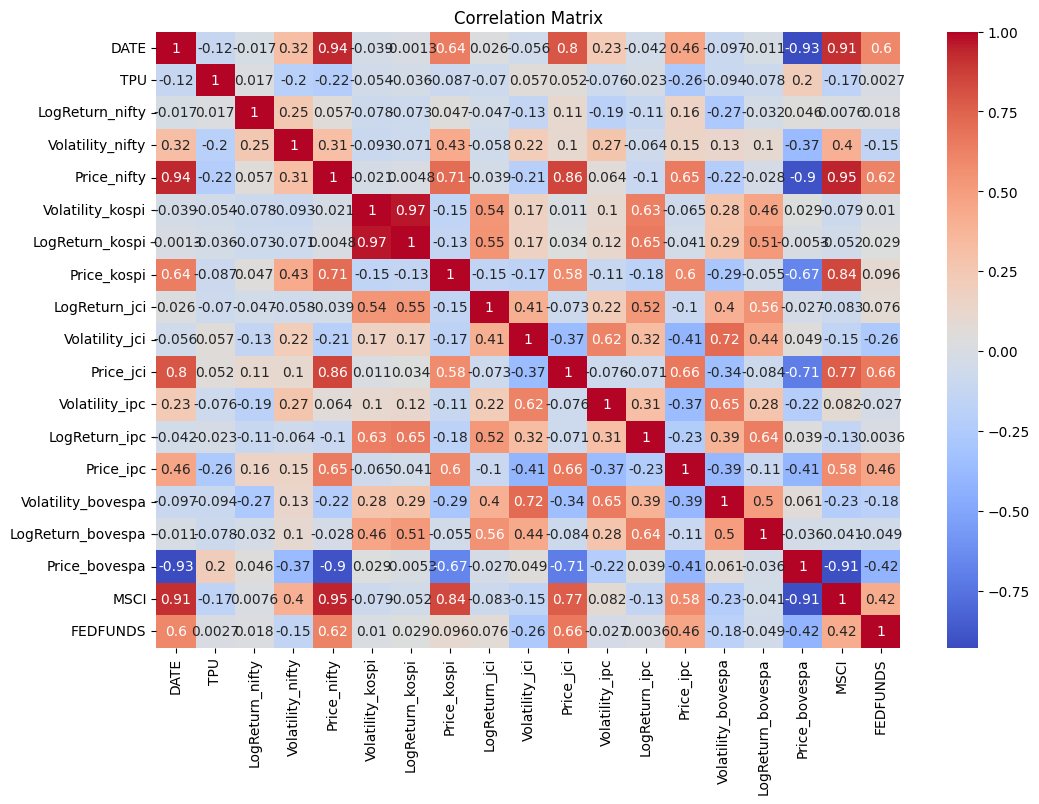

In [ ]:
#Correlation Matrix to check multicollinearity
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Trend analysis and visualization

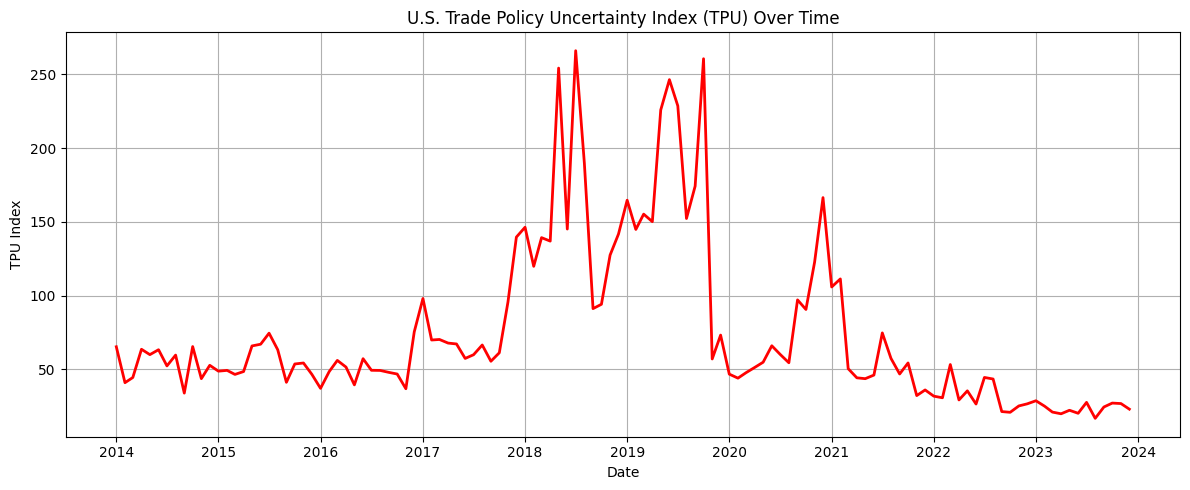

In [ ]:
#1. TPU Index over Time
#Why: Shows key moments of rising trade policy uncertainty (e.g. U.S.–China trade war, COVID
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(merged_df['DATE'], merged_df['TPU'], color='red', linewidth=2)
plt.title("U.S. Trade Policy Uncertainty Index (TPU) Over Time")
plt.xlabel("Date")
plt.ylabel("TPU Index")
plt.grid(True)
plt.tight_layout()
plt.show()


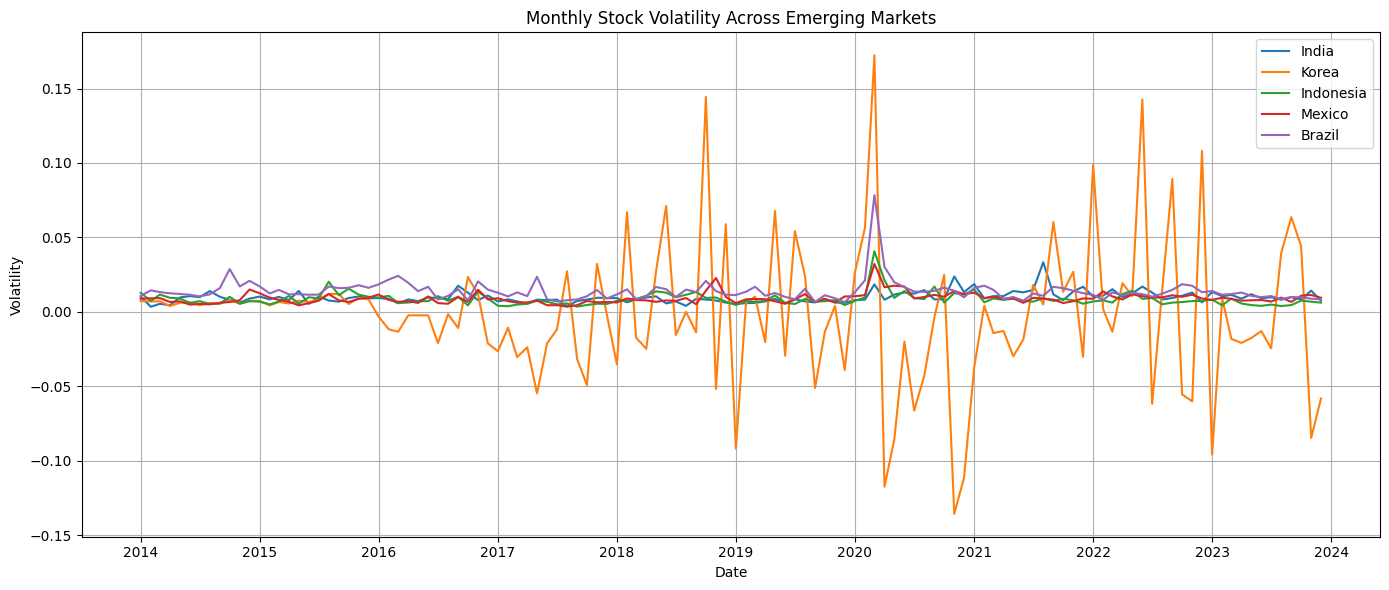

In [ ]:
#2. Volatility Trends Over Time (per country)
plt.figure(figsize=(14, 6))
plt.plot(merged_df['DATE'], merged_df['Volatility_nifty'], label='India')
plt.plot(merged_df['DATE'], merged_df['Volatility_kospi'], label='Korea')
plt.plot(merged_df['DATE'], merged_df['Volatility_jci'], label='Indonesia')
plt.plot(merged_df['DATE'], merged_df['Volatility_ipc'], label='Mexico')
plt.plot(merged_df['DATE'], merged_df['Volatility_bovespa'], label='Brazil')

plt.title("Monthly Stock Volatility Across Emerging Markets")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


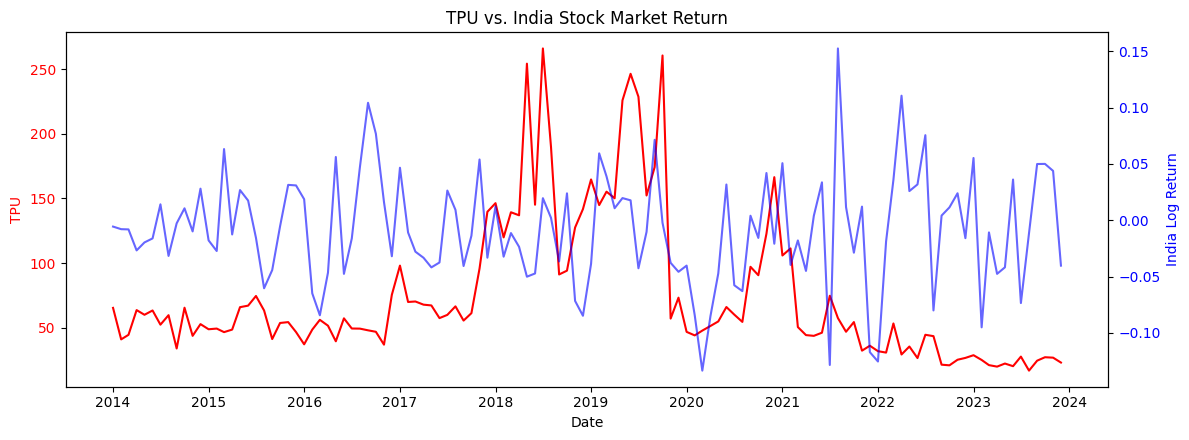

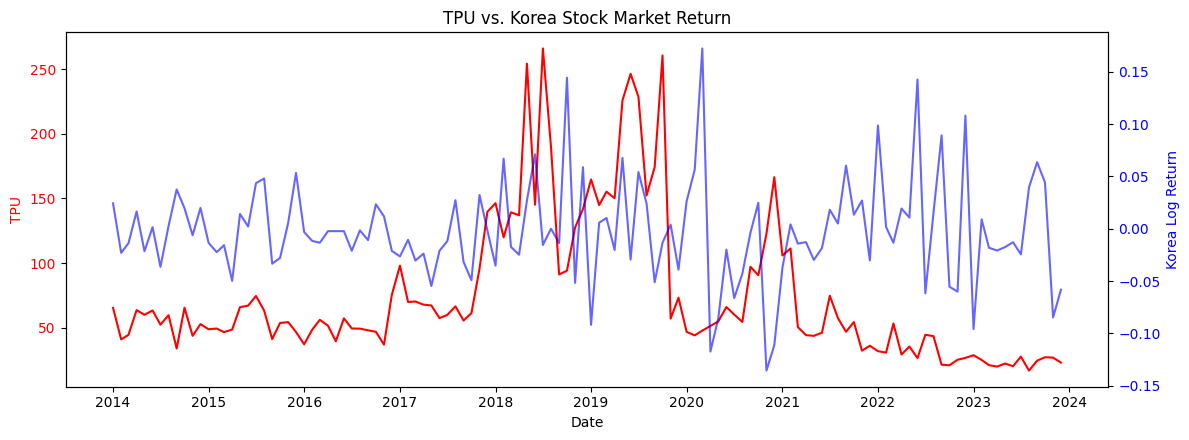

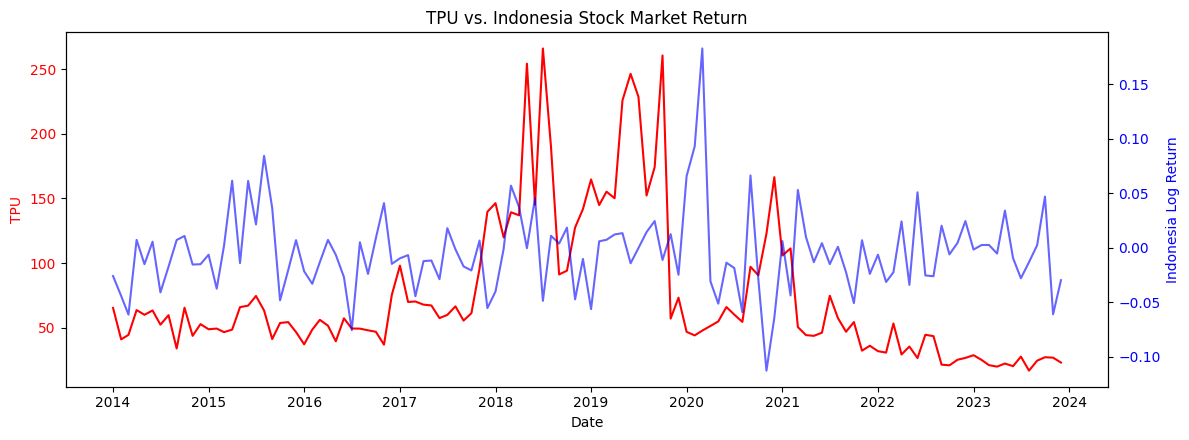

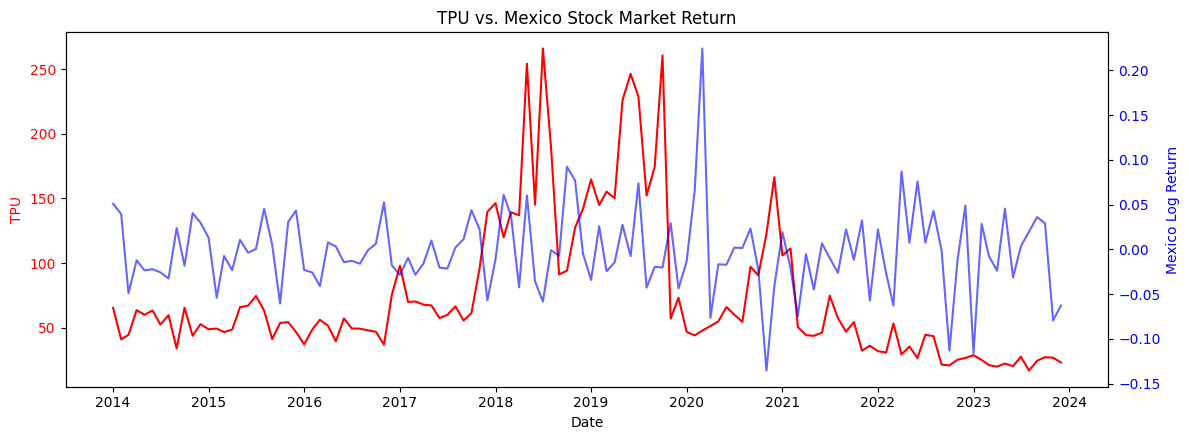

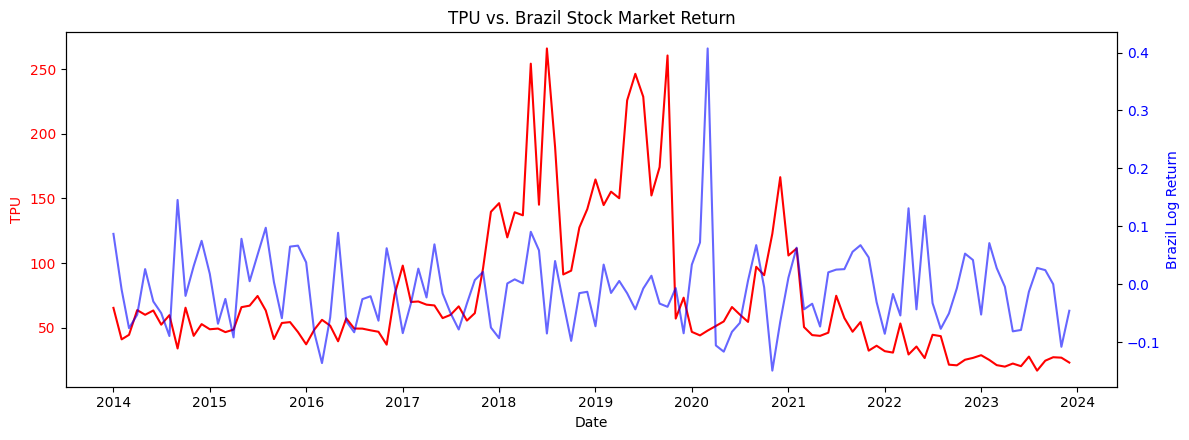

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary of country returns and labels
country_returns = {
    'India': 'LogReturn_nifty',
    'Korea': 'LogReturn_kospi',
    'Indonesia': 'LogReturn_jci',
    'Mexico': 'LogReturn_ipc',
    'Brazil': 'LogReturn_bovespa'
}

# Loop through each country to create the chart
for country, return_col in country_returns.items():
    fig, ax1 = plt.subplots(figsize=(12, 4.5))

    # TPU line on left axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('TPU', color='red')
    ax1.plot(merged_df['DATE'], merged_df['TPU'], color='red', linewidth=1.5)
    ax1.tick_params(axis='y', labelcolor='red')

    # Country return on right axis
    ax2 = ax1.twinx()
    ax2.set_ylabel(f'{country} Log Return', color='blue')
    ax2.plot(merged_df['DATE'], merged_df[return_col], color='blue', alpha=0.6)
    ax2.tick_params(axis='y', labelcolor='blue')

    plt.title(f"TPU vs. {country} Stock Market Return")
    fig.tight_layout()
    plt.show()


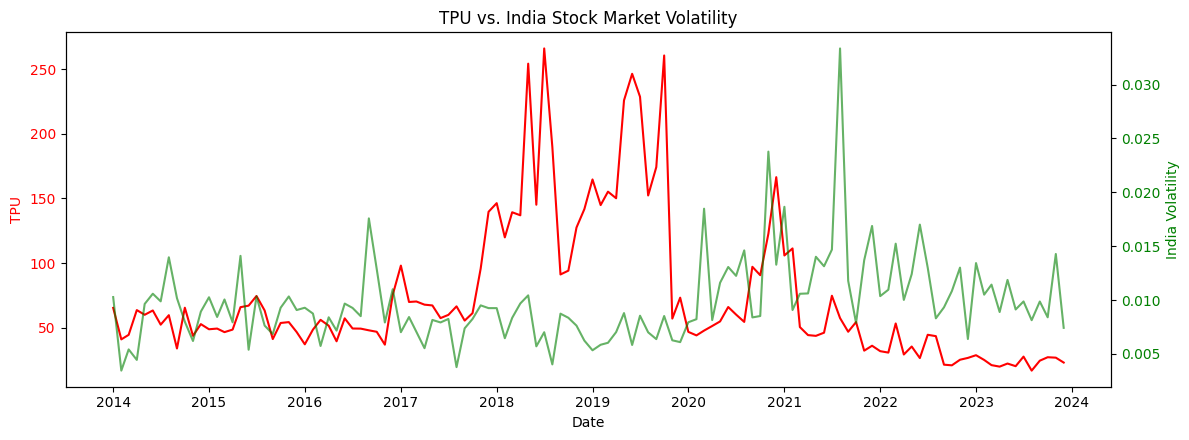

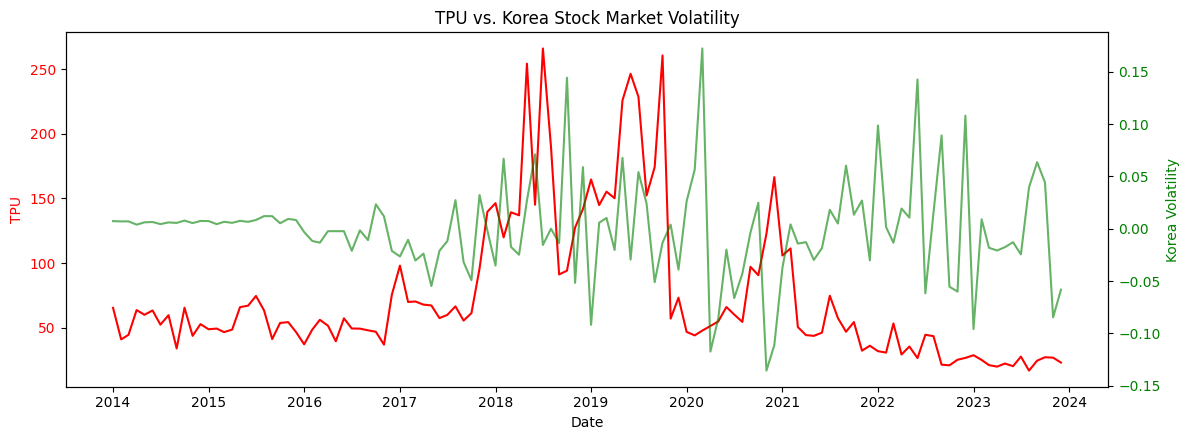

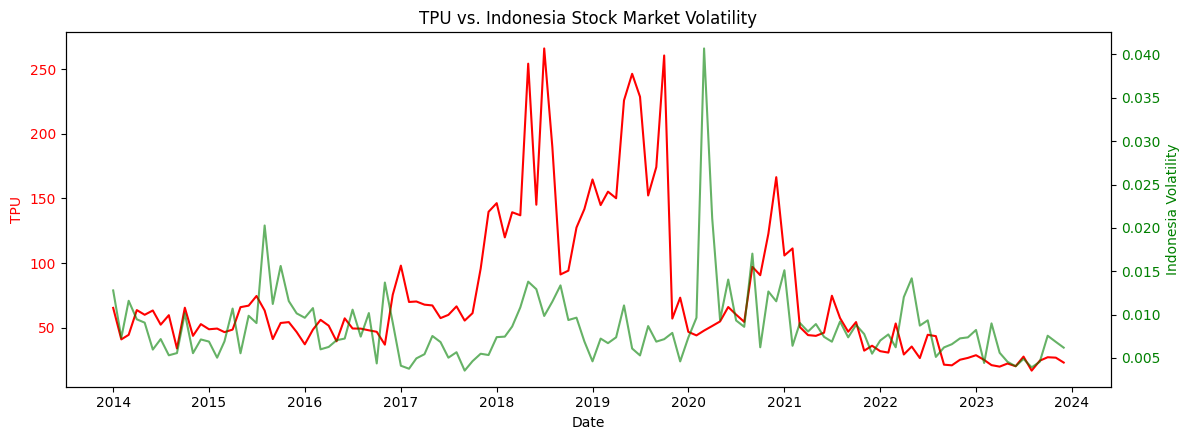

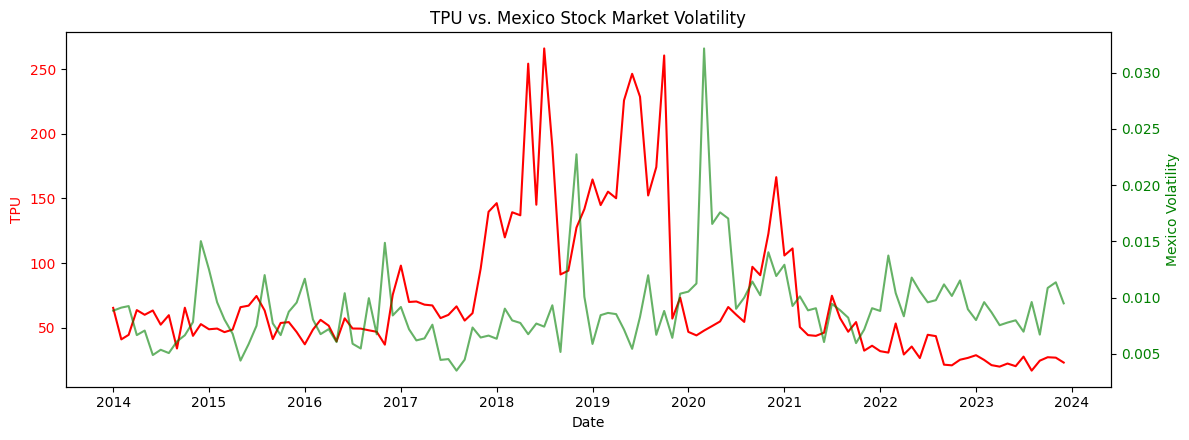

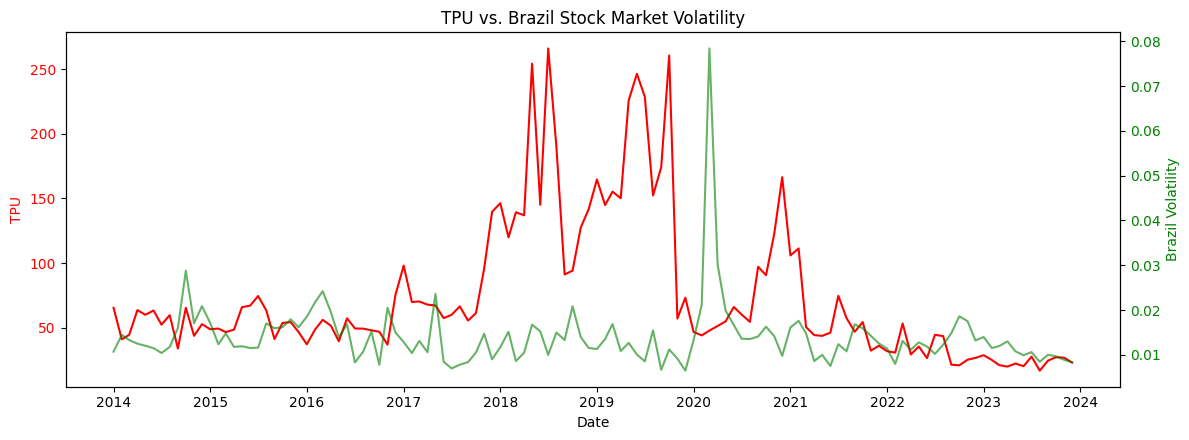

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of country volatilities and labels
country_volatility = {
    'India': 'Volatility_nifty',
    'Korea': 'Volatility_kospi',
    'Indonesia': 'Volatility_jci',
    'Mexico': 'Volatility_ipc',
    'Brazil': 'Volatility_bovespa'
}

# Loop through each country and create the chart
for country, vol_col in country_volatility.items():
    fig, ax1 = plt.subplots(figsize=(12, 4.5))

    # TPU line (left y-axis)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('TPU', color='red')
    ax1.plot(merged_df['DATE'], merged_df['TPU'], color='red', linewidth=1.5)
    ax1.tick_params(axis='y', labelcolor='red')

    # Volatility line (right y-axis)
    ax2 = ax1.twinx()
    ax2.set_ylabel(f'{country} Volatility', color='green')
    ax2.plot(merged_df['DATE'], merged_df[vol_col], color='green', alpha=0.6)
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title(f"TPU vs. {country} Stock Market Volatility")
    fig.tight_layout()
    plt.show()


#Stock return regression

In [ ]:
!pip install linearmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
# Step 1: Prepare each country's return data in long format
india = merged_df[['DATE', 'TPU', 'MSCI', 'FEDFUNDS', 'LogReturn_nifty']].copy()
india['Country'] = 'India'
india.rename(columns={'LogReturn_nifty': 'LogReturn'}, inplace=True)

korea = merged_df[['DATE', 'TPU', 'MSCI', 'FEDFUNDS', 'LogReturn_kospi']].copy()
korea['Country'] = 'Korea'
korea.rename(columns={'LogReturn_kospi': 'LogReturn'}, inplace=True)

indonesia = merged_df[['DATE', 'TPU', 'MSCI', 'FEDFUNDS', 'LogReturn_jci']].copy()
indonesia['Country'] = 'Indonesia'
indonesia.rename(columns={'LogReturn_jci': 'LogReturn'}, inplace=True)

mexico = merged_df[['DATE', 'TPU', 'MSCI', 'FEDFUNDS', 'LogReturn_ipc']].copy()
mexico['Country'] = 'Mexico'
mexico.rename(columns={'LogReturn_ipc': 'LogReturn'}, inplace=True)

brazil = merged_df[['DATE', 'TPU', 'MSCI', 'FEDFUNDS', 'LogReturn_bovespa']].copy()
brazil['Country'] = 'Brazil'
brazil.rename(columns={'LogReturn_bovespa': 'LogReturn'}, inplace=True)

In [ ]:
# Step 2: Combine all into one long-format DataFrame
return_df = pd.concat([india, korea, indonesia, mexico, brazil], axis=0)

# Step 3: Set the correct MultiIndex
return_df.set_index(['Country', 'DATE'], inplace=True)

# Step 4: Define X and y
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

X = return_df[['TPU', 'MSCI', 'FEDFUNDS']]
X = sm.add_constant(X)
y = return_df['LogReturn']

# Step 5: Run the panel fixed effects model
model = PanelOLS(y, X, entity_effects=True).fit()
print(model) # changed from print(model.summary()) to print(model)

                          PanelOLS Estimation Summary                           
Dep. Variable:              LogReturn   R-squared:                        0.0069
Estimator:                   PanelOLS   R-squared (Between):              0.0000
No. Observations:                 600   R-squared (Within):               0.0069
Date:                Wed, Apr 16 2025   R-squared (Overall):              0.0069
Time:                        10:32:50   Log-likelihood                    931.59
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.3681
Entities:                           5   P-value                           0.2515
Avg Obs:                       120.00   Distribution:                   F(3,592)
Min Obs:                       120.00                                           
Max Obs:                       120.00   F-statistic (robust):             1.3681
                            

In [ ]:
from linearmodels.panel import PanelOLS, RandomEffects, compare
import statsmodels.api as sm

# X and y should already be defined from earlier
X = sm.add_constant(return_df[['TPU', 'MSCI', 'FEDFUNDS']])
y = return_df['LogReturn']

# Fixed Effects
fe_model = PanelOLS(y, X, entity_effects=True).fit()


In [ ]:
# Random Effects model
re_model = RandomEffects(y, X).fit()
# Print the RE model summary
print("Random Effects Model Summary:")
print(re_model.summary)


Random Effects Model Summary:
                        RandomEffects Estimation Summary                        
Dep. Variable:              LogReturn   R-squared:                        0.0069
Estimator:              RandomEffects   R-squared (Between):            2.22e-16
No. Observations:                 600   R-squared (Within):               0.0069
Date:                Wed, Apr 16 2025   R-squared (Overall):              0.0069
Time:                        10:32:51   Log-likelihood                    931.08
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.3751
Entities:                           5   P-value                           0.2494
Avg Obs:                       120.00   Distribution:                   F(3,596)
Min Obs:                       120.00                                           
Max Obs:                       120.00   F-statistic (robust):             1.375

In [ ]:
# Compare the two models using the Hausman test
comparison = compare({'Fixed Effects': fe_model, 'Random Effects': re_model})
print(comparison)


                    Model Comparison                    
                         Fixed Effects    Random Effects
--------------------------------------------------------
Dep. Variable                LogReturn         LogReturn
Estimator                     PanelOLS     RandomEffects
No. Observations                   600               600
Cov. Est.                   Unadjusted        Unadjusted
R-squared                       0.0069            0.0069
R-Squared (Within)              0.0069            0.0069
R-Squared (Between)             0.0000          2.22e-16
R-Squared (Overall)             0.0069            0.0069
F-statistic                     1.3681            1.3751
P-value (F-stat)                0.2515            0.2494
=====================     ============   ===============
const                           0.0157            0.0157
                              (1.4109)          (1.4019)
TPU                         -4.912e-05        -4.912e-05
                             (-

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

def hausman(fe, re):
    """Manual Hausman test between fixed effects and random effects"""
    b = fe.params
    B = re.params

    v_b = fe.cov
    v_B = re.cov

    diff = b - B
    v_diff = v_b - v_B

    # Ensure matrix is invertible
    try:
        stat = np.dot(diff.T, np.linalg.inv(v_diff)).dot(diff)
        df = diff.shape[0]
        pval = 1 - chi2.cdf(stat, df)
        return pd.Series([stat, pval], index=["Hausman Stat", "p-value"])
    except np.linalg.LinAlgError:
        return pd.Series([np.nan, np.nan], index=["Hausman Stat", "p-value"])


In [ ]:
hausman_result = hausman(fe_model, re_model)
print(hausman_result)


Hausman Stat    2.492252e-28
p-value         1.000000e+00
dtype: float64


#Volatility Regression

In [ ]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects
import statsmodels.api as sm

# Step 1: Define the country-specific volatility columns
volatility_columns = {
    'India': 'Volatility_nifty',
    'Korea': 'Volatility_kospi',
    'Indonesia': 'Volatility_jci',
    'Mexico': 'Volatility_ipc',
    'Brazil': 'Volatility_bovespa'
}

In [ ]:
# Step 2: Initialize an empty list to collect all the data
panel_data_volatility = []

# Step 3: Loop through each country and prepare panel data
for country, column in volatility_columns.items():
    temp_df = merged_df[['DATE', column, 'TPU', 'MSCI', 'FEDFUNDS']].copy()
    temp_df = temp_df.rename(columns={column: 'Volatility'})
    temp_df['Country'] = country
    panel_data_volatility.append(temp_df)

# Step 4: Combine into one panel DataFrame
panel_vol_df = pd.concat(panel_data_volatility)
panel_vol_df['DATE'] = pd.to_datetime(panel_vol_df['DATE'])
panel_vol_df.set_index(['Country', 'DATE'], inplace=True)

# Step 5: Prepare dependent and independent variables
y_vol = panel_vol_df['Volatility']
X_vol = panel_vol_df[['TPU', 'MSCI', 'FEDFUNDS']]
X_vol = sm.add_constant(X_vol)

# Step 6: Estimate Fixed Effects model
fe_model_vol = PanelOLS(y_vol, X_vol, entity_effects=True).fit()

In [ ]:
# Step 7: Estimate Random Effects model
re_model_vol = RandomEffects(y_vol, X_vol).fit()

# Step 8: Hausman test for model comparison
from linearmodels.panel import compare
comparison_vol = compare({'Fixed Effects': fe_model_vol, 'Random Effects': re_model_vol})

(fe_model_vol.summary, re_model_vol.summary, comparison_vol)

(<class 'linearmodels.compat.statsmodels.Summary'>
 """
                           PanelOLS Estimation Summary                           
 Dep. Variable:             Volatility   R-squared:                        0.0035
 Estimator:                   PanelOLS   R-squared (Between):              0.0000
 No. Observations:                 600   R-squared (Within):               0.0035
 Date:                Wed, Apr 16 2025   R-squared (Overall):              0.0033
 Time:                        10:32:51   Log-likelihood                    1450.2
 Cov. Estimator:            Unadjusted                                           
                                         F-statistic:                      0.6897
 Entities:                           5   P-value                           0.5586
 Avg Obs:                       120.00   Distribution:                   F(3,592)
 Min Obs:                       120.00                                           
 Max Obs:                       120.00   F

In [ ]:
!pip install --upgrade linearmodels # install/upgrade the package

import numpy as np
import pandas as pd
from scipy.stats import chi2

def hausman(fe, re):
    """Manual Hausman test between fixed effects and random effects"""
    b = fe.params
    B = re.params

    v_b = fe.cov
    v_B = re.cov

    diff = b - B
    v_diff = v_b - v_B

    # Ensure matrix is invertible
    try:
        stat = np.dot(diff.T, np.linalg.inv(v_diff)).dot(diff)
        df = diff.shape[0]
        pval = 1 - chi2.cdf(stat, df)
        return pd.Series([stat, pval], index=["Hausman Stat", "p-value"])
    except np.linalg.LinAlgError:
        return pd.Series([np.nan, np.nan], index=["Hausman Stat", "p-value"])

# Then, run the test like this:
hausman_result_vol = hausman(fe_model_vol, re_model_vol)
print("Hausman Test p-value (Volatility model):", hausman_result_vol['p-value'])


Hausman Test p-value (Volatility model): 1.0


#Textfile

In [ ]:
# Save all code cells as a text file
code = ''
for cell in get_ipython().user_ns['_ih']:
    code += cell + '\n\n'

with open('my_python_code.txt', 'w') as f:
    f.write(code)


In [ ]:
from google.colab import files
files.download('my_python_code.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>